### Importing Libraries

In [78]:
import  warnings 
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
warnings.filterwarnings("ignore")

### Getting our Data

In [79]:
# reading data
flights = pd.read_csv('../flight_data/flights.csv')
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
# printing basic info
flights.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

### Data Cleaning

In [81]:
flights.value_counts('DIVERTED')  # will tell us the no. of flights which were diverted

DIVERTED
0    5803892
1      15187
dtype: int64

In [82]:
flights =flights[flights.DIVERTED == 0 ] #removing diverted flights

In [83]:
flights.value_counts('CANCELLED') # will tell us the no. of flights which were CANCELLED

CANCELLED
0    5714008
1      89884
dtype: int64

In [84]:
flights =flights[flights.CANCELLED == 0 ] #removing CANCELLED flights

### Data Visualization

In [85]:
plotting_data =  flights[0:100000]

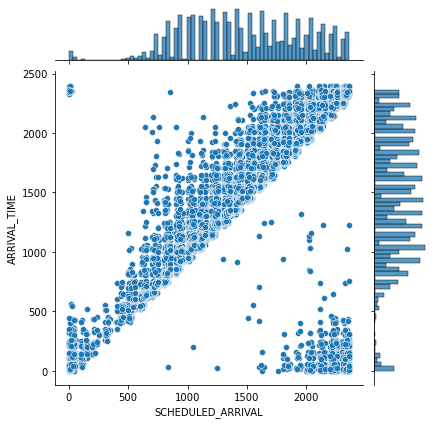

In [86]:

sb.jointplot(data=plotting_data, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")

### Data Preprocessing

In [87]:
# filtering out unnecessary columns
flights_needed_data=flights.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT',
                                              'SCHEDULED_TIME','DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME',
                                              'AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY','AIRLINE_DELAY','DIVERTED','CANCELLED'],
                                             axis=1)

In [88]:
flights_needed_data.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0


### Checking for Null values 

In [89]:
#Checking for null value and printing all values
tab_info=pd.DataFrame(flights_needed_data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(flights_needed_data.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(flights_needed_data.isnull().sum()/flights_needed_data.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
column type,int64,int64,object,object,int64,float64,int64,float64,float64
null values (nb),0,0,0,0,0,0,0,0,0
null values (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### modeling phase

In [90]:
# creating a new column; it will tell if the flight was delayed or not
result=[]

In [91]:
for row in flights_needed_data['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0)  

In [92]:
flights_needed_data['result'] = result

In [93]:
flights_needed_data.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,result
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0


In [94]:
#printing delayed vs not delayed flights
flights_needed_data.value_counts('result')

result
0    4690510
1    1023498
dtype: int64

In [95]:
# removing some more columns
flights_needed_data=flights_needed_data.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights_needed_data.head()

,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,result
0,1,1,5,-11.0,430,0
1,1,1,10,-8.0,750,0
2,1,1,20,-2.0,806,0
3,1,1,20,-5.0,805,0
4,1,1,25,-1.0,320,0


### Splitting Data for Training and Testing

In [52]:
data = flights_needed_data.values

X, y = data[:,:-1], data[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30

In [53]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

### Applying Decision Tree Classifier on Training Data

In [54]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

### Making Predictions and Checking Accuracy

In [55]:
pred_prob = clf.predict_proba(X_test)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.8204974740664986